import cv2 as cv
import numpy as np
max_h = 0
max_w = 0
for i in range(1,1681):
    name = './current_data/AllImages/1' + str(i).zfill(8) + '.bmp'
    img = cv.imread(name)
    if img is None:
        pass
    else:
        img_h, img_w, ch = img.shape
        print(name)
        if img_h > max_h:
            max_h = img_h
        if img_w > max_w:
            max_w = img_w
print('max_h: %d, max_w: %d' % (max_h, max_w))

In [1]:
import cv2 as cv
import numpy as np
import os
new_h = 844
new_w = 1238
for i in range(1,1681):
    path = './current_data/AllImages/1' + str(i).zfill(8) + '.bmp'
    root, name = os.path.split(path)
    img = cv.imread(path)
    if img is None:
        pass
    else:
        img_h, img_w, ch = img.shape
        padding = np.full((new_h,new_w,3),(34,47,32), dtype=np.uint8)
        padding[0:img_h, 0:img_w] = img
        cv.imwrite('./pad/'+ name, padding)


In [45]:
import torch
a = torch.arange(60)
a = torch.reshape(a,(3,2,10))
b = torch.stack([a,a,a,a])
print(b.shape)

torch.Size([4, 3, 2, 10])


In [46]:
print(a)

tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]]])


In [49]:
m = torch.randint(1,100,size=(2,5))
print(m)
c = [torch.mul(a[i], torch.index_select(m,1,torch.tensor(i))) for i in range(3)]

tensor([[96, 24, 97,  8, 85],
        [ 6, 81, 76, 34, 22]])


In [11]:
import torch
a = torch.arange(10).reshape(2,5)
c = torch.rand(2)
print(a)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [15]:
b = []
for i in range(5):
    b.append(torch.rand(2))
print(b)

[tensor([0.1750, 0.4232]), tensor([0.7378, 0.1074]), tensor([0.1369, 0.4922]), tensor([0.8224, 0.6093]), tensor([0.9875, 0.0024])]


In [18]:
d = torch.stack(b).transpose(1,0)
print(d)
print(d.shape)

tensor([[0.1750, 0.7378, 0.1369, 0.8224, 0.9875],
        [0.4232, 0.1074, 0.4922, 0.6093, 0.0024]])
torch.Size([2, 5])


In [19]:
d = torch.stack(b, dim=1)
print(d)
print(d.shape)

tensor([[0.1750, 0.7378, 0.1369, 0.8224, 0.9875],
        [0.4232, 0.1074, 0.4922, 0.6093, 0.0024]])
torch.Size([2, 5])


In [26]:
a = torch.arange(6).reshape((2,3))

b = torch.arange(6).reshape((2,3))
print(a, b)

tensor([[0, 1, 2],
        [3, 4, 5]]) tensor([[0, 1, 2],
        [3, 4, 5]])


In [27]:
a*b

tensor([[ 0,  1,  4],
        [ 9, 16, 25]])

In [3]:
import torch.nn as nn
import torch
import networks

class a(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = networks.CoreNetwork(2,256)
        self.fc = nn.Linear(256,256)
        self.last = nn.Linear(256,1)
        self.init_h = torch.zeros(2, 256, dtype=torch.float32, requires_grad=True)
    def forward(self,h):

        for i in range(3):
            z = self.fc(h)
            h = self.lstm(z)
        out = self.last(h)
        return out
        

In [7]:
model = a()
opt = torch.optim.Adam(model.parameters(), lr=0.0001)
h = model.init_h
for i in range(10):
    out = model(h)
    out = torch.max(out, 1)[0]
    print(out)

loss = out[0]
loss.backward()
opt.step()


tensor([0.0170, 0.0170], grad_fn=<MaxBackward0>)
tensor([0.0191, 0.0191], grad_fn=<MaxBackward0>)
tensor([0.0194, 0.0194], grad_fn=<MaxBackward0>)
tensor([0.0194, 0.0194], grad_fn=<MaxBackward0>)
tensor([0.0193, 0.0193], grad_fn=<MaxBackward0>)
tensor([0.0193, 0.0193], grad_fn=<MaxBackward0>)
tensor([0.0193, 0.0193], grad_fn=<MaxBackward0>)
tensor([0.0193, 0.0193], grad_fn=<MaxBackward0>)
tensor([0.0193, 0.0193], grad_fn=<MaxBackward0>)
tensor([0.0193, 0.0193], grad_fn=<MaxBackward0>)


In [8]:
import os
path = './HRSC2016/Train/AllImages/image_names.txt'
with open(path) as f:
    image_name_list = [i.strip() for i in f.readlines()]
    
counter = {}
keys = range(100000000, 100000099)
for key in keys:
    counter[str(key)] = 0
count = 0
for image_name in image_name_list:
    root, name = os.path.split(image_name)
    xmlName = os.path.join(root.replace('AllImages', 'Annotations'), name[:-4]+'.xml')
    with open(xmlName, 'r', encoding='utf-8-sig') as f:
        content = f.read()
        if '<HRSC_Object>'  in content:
            count = count + 1
        else:
            print(xmlName)
        #objects = content.split('<HRSC_Object>')
        #print(objects)
        """
        info = objects.pop(0)
        print(xmlName)
        cls_id = 0
        for obj in objects:
            #print(type(obj))
            cls_id = obj[obj.find('<Class_ID>')+10 : obj.find('</Class_ID>')]
            #if cls_id == '':
            print(cls_id)
            counter[cls_id] = counter[cls_id] + 1
        """
print('done')
print(count)

/home/chs/py/cmap/HRSC2016/Train/Annotations/100000624.xml
/home/chs/py/cmap/HRSC2016/Train/Annotations/100000628.xml
/home/chs/py/cmap/HRSC2016/Train/Annotations/100000633.xml
/home/chs/py/cmap/HRSC2016/Train/Annotations/100000639.xml
/home/chs/py/cmap/HRSC2016/Train/Annotations/100000671.xml
/home/chs/py/cmap/HRSC2016/Train/Annotations/100000695.xml
/home/chs/py/cmap/HRSC2016/Train/Annotations/100000702.xml
/home/chs/py/cmap/HRSC2016/Train/Annotations/100000752.xml
/home/chs/py/cmap/HRSC2016/Train/Annotations/100000908.xml
done
615


In [2]:

for key in keys:
    if counter[str(key)] != 0:
        print(key,': ',counter[str(key)])


100000001 :  385
100000002 :  1
100000003 :  44
100000004 :  1
100000005 :  50
100000006 :  20
100000007 :  265
100000008 :  66
100000009 :  131
100000010 :  30
100000011 :  160
100000013 :  8
100000015 :  51
100000016 :  99
100000018 :  34
100000019 :  47
100000020 :  15
100000022 :  55
100000024 :  8
100000025 :  164
100000026 :  6
100000027 :  44
100000028 :  5
100000029 :  15
100000030 :  25
100000032 :  13


In [7]:
import torch
import torch.nn as nn
class rnn(nn.Module):
    def __init__(self, b, size):
        super().__init__()
        self.lstm = nn.LSTMCell(size, size)
        self.h = torch.zeros(b, size, dtype=torch.float32, requires_grad=True)
        self.c = torch.zeros(b, size, dtype=torch.float32, requires_grad=True)
    def forward(self, h_t):
        self.h, self.c = self.lstm(h_t, (self.h, self.c))
        return self.h
        
    

In [13]:
lstm = rnn(1,256)
fc = nn.Linear(256,2)
h_t = torch.rand(1,256)
for i in range(4):
    h_t = torch.rand(1,256)
    h_t = lstm(h_t)
out = fc(h_t)
l = out.sum()
l.backward()


In [9]:
import PIL.Image as Image
import torchvision
import matplotlib.pyplot as plt
import numpy as np

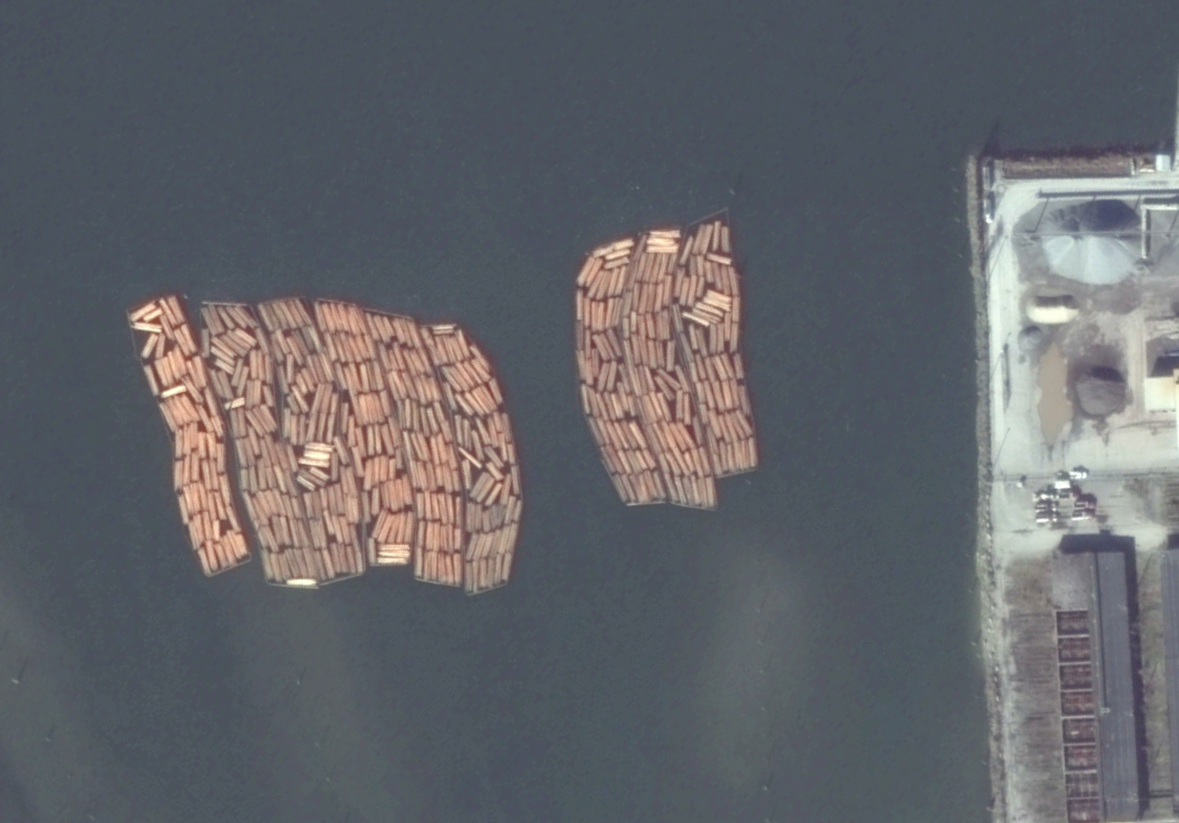

In [11]:
image_pth = "./HRSC2016/Train/no_object/100000624.bmp"
img_pil = Image.open(image_pth, mode='r')
img_pil = img_pil.convert('RGB')
img_pil

In [17]:
from torchvision import transforms
from torchvision.transforms import functional as TF
import random

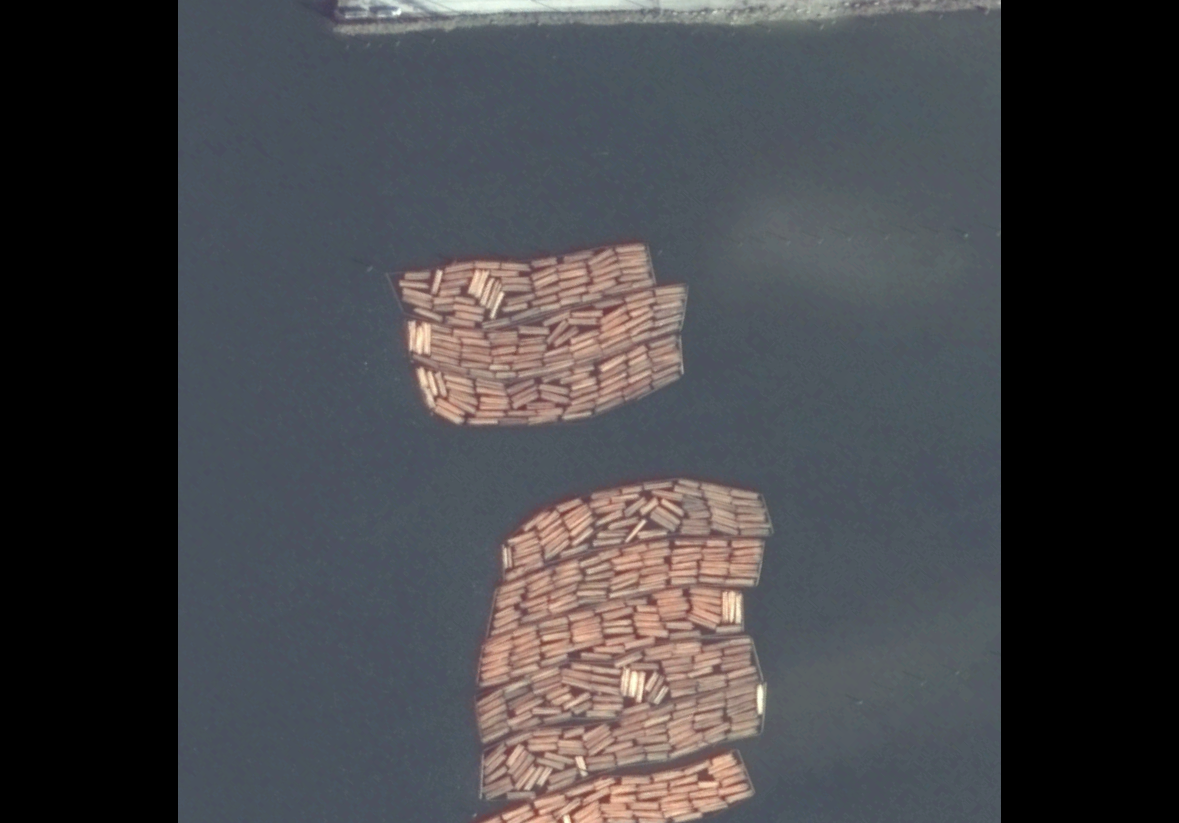

In [21]:
angle = random.choice([90, 180, -90])
trans = transforms.Compose([transforms.RandomRotation((angle,angle))])
new_img = trans(img_pil)
new_img